# Where to take my talents to - a world happiness analysis


In this notebook, we are going to study happiness in the world over the years from 2015 to 2020 and we are going to try to verify the impact of the coronavirus on the happiness of the countries this year 2020. To do this, we will use techniques learned throughout the course, such as regression, correlation studies, matching, visualization of results, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import networkx as nx
import seaborn as sns
import warnings
from scipy import stats
import pycountry_convert as pc

# Imports for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# INTERACTIVE VISUALIZATION
import chart_studio
username = 'adrmntr'
password = 'ZSQXion6nKdombVa4kZD'
chart_studio.tools.set_credentials_file(username=username, api_key = password)

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
y2015 = pd.read_csv("Data/2015.csv")
y2016 = pd.read_csv("Data/2016.csv")
y2017 = pd.read_csv("Data/2017.csv")
y2018 = pd.read_csv("Data/2018.csv")
y2019 = pd.read_csv("Data/2019.csv")
y2020 = pd.read_csv("Data/2020.csv")

## Preprocessing 

For each year's dataframe, we will preprocess the data by determining if there are any invalid entries. Specifically, any values of NaN or 0 (when not appropriate), will be treated by taking the mean of the remaining values in the column. We then concatenate all the dataframes to form a final version which includes all the years.

In [3]:
# COLUMNS IMPORTANTS 
cols=['Year','Country','Happiness_Score','Happiness_Rank', 'GDP_per_capita', 'Healthy_life_expectancy','Freedom', 'Generosity','Perceptions_of_corruption']

In [4]:
y2015.rename(columns={'Economy (GDP per Capita)':'GDP_per_capita', \
                      'Happiness Score':'Happiness_Score',\
                      'Happiness Rank':'Happiness_Rank',\
                       'Health (Life Expectancy)':'Healthy_life_expectancy',\
                     'Trust (Government Corruption)':'Perceptions_of_corruption'}, inplace=True)
y2015['Year']=2015
y2015=y2015.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2015== 0).sum())
print('Number of null:', y2015.isnull().sum().sum())

y2015.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               1
Healthy_life_expectancy      1
Freedom                      1
Generosity                   1
Perceptions_of_corruption    1
dtype: int64
Number of null: 0


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2015,Switzerland,7.587,1,1.39651,0.94143,0.66557,0.29678,0.41978
1,2015,Iceland,7.561,2,1.30232,0.94784,0.62877,0.43630,0.14145
2,2015,Denmark,7.527,3,1.32548,0.87464,0.64938,0.34139,0.48357
3,2015,Norway,7.522,4,1.45900,0.88521,0.66973,0.34699,0.36503
4,2015,Canada,7.427,5,1.32629,0.90563,0.63297,0.45811,0.32957


In [5]:
y2016.rename(columns={'Economy (GDP per Capita)':'GDP_per_capita', \
                     'Happiness Score':'Happiness_Score',\
                      'Happiness Rank':'Happiness_Rank',\
                       'Health (Life Expectancy)':'Healthy_life_expectancy',\
                     'Trust (Government Corruption)':'Perceptions_of_corruption'}, inplace=True)
y2016['Year']=2016
y2016=y2016.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2016== 0).sum())
print('Number of null:', y2016.isnull().sum().sum())

y2016.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               1
Healthy_life_expectancy      1
Freedom                      1
Generosity                   1
Perceptions_of_corruption    1
dtype: int64
Number of null: 0


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2016,Denmark,7.526,1,1.44178,0.79504,0.57941,0.36171,0.44453
1,2016,Switzerland,7.509,2,1.52733,0.86303,0.58557,0.28083,0.41203
2,2016,Iceland,7.501,3,1.42666,0.86733,0.56624,0.47678,0.14975
3,2016,Norway,7.498,4,1.57744,0.79579,0.59609,0.37895,0.35776
4,2016,Finland,7.413,5,1.40598,0.81091,0.57104,0.25492,0.41004


In [6]:
y2017.rename(columns={'Economy..GDP.per.Capita.':'GDP_per_capita', \
                       'Health..Life.Expectancy.':'Healthy_life_expectancy',\
                     'Trust..Government.Corruption.':'Perceptions_of_corruption',\
                     'Happiness.Rank': 'Happiness_Rank',\
                     'Happiness.Score': 'Happiness_Score'}, inplace=True)
y2017['Year']=2017
y2017=y2017.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2017== 0).sum())
print('Number of null:', y2017.isnull().sum().sum())

y2017.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               1
Healthy_life_expectancy      1
Freedom                      1
Generosity                   1
Perceptions_of_corruption    1
dtype: int64
Number of null: 0


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2017,Norway,7.537,1,1.616463,0.796667,0.635423,0.362012,0.315964
1,2017,Denmark,7.522,2,1.482383,0.792566,0.626007,0.355280,0.400770
2,2017,Iceland,7.504,3,1.480633,0.833552,0.627163,0.475540,0.153527
3,2017,Switzerland,7.494,4,1.564980,0.858131,0.620071,0.290549,0.367007
4,2017,Finland,7.469,5,1.443572,0.809158,0.617951,0.245483,0.382612


In [7]:
y2018.rename(columns={'Freedom to make life choices':'Freedom',\
                      'Overall rank': 'Happiness_Rank',\
                      'Country or region':'Country',\
                      'GDP per capita':'GDP_per_capita',\
                      'Perceptions of corruption':'Perceptions_of_corruption',\
                      'Healthy life expectancy':'Healthy_life_expectancy',\
                      'Score': 'Happiness_Score'}, inplace=True)
y2018['Year']=2018
y2018=y2018.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2018== 0).sum())
print('Number of null:', y2018.isnull().sum().sum())
print(y2018.columns[y2018.isna().any()].tolist())

y2018.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               1
Healthy_life_expectancy      1
Freedom                      1
Generosity                   1
Perceptions_of_corruption    2
dtype: int64
Number of null: 1
['Perceptions_of_corruption']


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2018,Finland,7.632,1,1.305,0.874,0.681,0.202,0.393
1,2018,Norway,7.594,2,1.456,0.861,0.686,0.286,0.340
2,2018,Denmark,7.555,3,1.351,0.868,0.683,0.284,0.408
3,2018,Iceland,7.495,4,1.343,0.914,0.677,0.353,0.138
4,2018,Switzerland,7.487,5,1.420,0.927,0.660,0.256,0.357


In [8]:
y2019.rename(columns={'Freedom to make life choices':'Freedom',\
                      'Overall rank': 'Happiness_Rank',\
                      'Country or region':'Country',\
                      'GDP per capita':'GDP_per_capita',\
                      'Perceptions of corruption':'Perceptions_of_corruption',\
                      'Healthy life expectancy':'Healthy_life_expectancy',\
                      'Score': 'Happiness_Score'}, inplace=True)
y2019['Year']=2019
y2019=y2019.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2019== 0).sum())
print('Number of null:', y2019.isnull().sum().sum())

y2019.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               1
Healthy_life_expectancy      1
Freedom                      1
Generosity                   1
Perceptions_of_corruption    1
dtype: int64
Number of null: 0


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2019,Finland,7.769,1,1.340,0.986,0.596,0.153,0.393
1,2019,Denmark,7.600,2,1.383,0.996,0.592,0.252,0.410
2,2019,Norway,7.554,3,1.488,1.028,0.603,0.271,0.341
3,2019,Iceland,7.494,4,1.380,1.026,0.591,0.354,0.118
4,2019,Netherlands,7.488,5,1.396,0.999,0.557,0.322,0.298


In [9]:
y2020.rename(columns={'Freedom to make life choices':'Freedom',\
                      'Logged GDP per capita':'GDP_per_capita', \
                      'Country name': 'Country',\
                      'Perceptions of corruption':'Perceptions_of_corruption',\
                      'Healthy life expectancy':'Healthy_life_expectancy',\
                      'Ladder score': 'Happiness_Score'}, inplace=True)
y2020['Happiness_Rank'] = y2020['Happiness_Score'].rank(ascending=False)
y2020['Year']=2020
y2020=y2020.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2020== 0).sum())
print('Number of null:', y2020.isnull().sum().sum())

y2020.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               0
Healthy_life_expectancy      0
Freedom                      0
Generosity                   0
Perceptions_of_corruption    0
dtype: int64
Number of null: 0


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2020,Finland,7.8087,1.0,10.639267,71.900825,0.949172,-0.059482,0.195445
1,2020,Denmark,7.6456,2.0,10.774001,72.402504,0.951444,0.066202,0.168489
2,2020,Switzerland,7.5599,3.0,10.979933,74.102448,0.921337,0.105911,0.303728
3,2020,Iceland,7.5045,4.0,10.772559,73.000000,0.948892,0.246944,0.711710
4,2020,Norway,7.4880,5.0,11.087804,73.200783,0.955750,0.134533,0.263218


We observe that the values with zero/null can in fact be replaced by the mean of the remaining entries for the corresponding column. The only columns where this wouldn't make sense is for `Country` and `Happiness_Rank`. We note that `y2020` has no invalid entries.

We now mask all zero/null entries with the corresponding column mean.

We also observe a discrepancy in units used between the `y2020` dataframe vs. the rest. Specifically, the `GDP_per_capita` and `Healthy_life_expectancy` are notably different magnitudes in y2020. Additionally, the range of values in certain columns of `y2020` are much greater than the other years. For example, for Finland the corresponding values are:

* `GDP_per_capita`: 10.64 (2020) vs. 1.34 (2019)
* `Healthy_life_expectancy`: 71.90 (2020) vs. 0.99 (2019)

We decide to address this issue by normalizing the data for all columns that *do not* belong to `Country`, `Happiness_Score` and `Happiness_Rank`.

We also note that normalizing the data for each year's dataframe will re-introduce zero values. However, the interpretation is different from having invalid entries.

In [10]:
# replace invalid values with mean

y2015=y2015.mask(y2015==0).fillna(y2015.mean())
y2016=y2016.mask(y2016==0).fillna(y2016.mean())
y2017=y2017.mask(y2017==0).fillna(y2017.mean())
y2018=y2018.mask(y2018==0).fillna(y2018.mean())
y2019=y2019.mask(y2019==0).fillna(y2019.mean())

In [11]:
# only normalize certain data

cols_to_norm = ['GDP_per_capita','Healthy_life_expectancy','Freedom','Generosity','Perceptions_of_corruption']

y2015[cols_to_norm] = y2015[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y2016[cols_to_norm] = y2016[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y2017[cols_to_norm] = y2017[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y2018[cols_to_norm] = y2018[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y2019[cols_to_norm] = y2019[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y2020[cols_to_norm] = y2020[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [12]:
df = pd.concat([y2015, y2016, y2017, y2018, y2019, y2020], axis=0)
df.head()

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2015,Switzerland,7.587,1.0,0.824544,0.914250,0.992982,0.371323,0.759606
1,2015,Iceland,7.561,2.0,0.768315,0.920807,0.930897,0.547066,0.253220
2,2015,Denmark,7.527,3.0,0.782141,0.845922,0.965668,0.427515,0.875664
3,2015,Norway,7.522,4.0,0.861849,0.856735,1.000000,0.434569,0.659996
4,2015,Canada,7.427,5.0,0.782625,0.877625,0.937983,0.574538,0.595481


In [13]:
# df.to_csv()

In [14]:
df.loc[df['Country']=="Switzerland"]

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2015,Switzerland,7.5870,1.0,0.824544,0.914250,0.992982,0.371323,0.759606
1,2016,Switzerland,7.5090,2.0,0.832015,0.901873,0.961981,0.325945,0.814379
3,2017,Switzerland,7.4940,4.0,0.834542,0.903212,0.940648,0.338665,0.788440
4,2018,Switzerland,7.4870,5.0,0.673745,0.899020,0.909605,0.402098,0.780702
5,2019,Switzerland,7.4800,6.0,0.860072,0.914093,0.904992,0.439926,0.755011
2,2020,Switzerland,7.5599,3.0,0.905054,0.914502,0.907228,0.472182,0.234856


## What affects a country's happiness score?

We evaluate the significance of each feature for the given dataframe to determine what factors affect a country's happiness score. Additionally, we examine if any features are more correlated than others.

In [15]:
mod = smf.ols(formula='Happiness_Score ~ GDP_per_capita + Healthy_life_expectancy + Freedom + Generosity + Perceptions_of_corruption', data=df)
np.random.seed(2)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     506.5
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          2.15e-262
Time:                        22:42:21   Log-Likelihood:                -821.36
No. Observations:                 935   AIC:                             1655.
Df Residuals:                     929   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

We observe at the 95% significance level that `Perceptions_of_corruption` is not deemed significant. We can also observe that the `GDP_per_capita` is the independent variable with the highest coefficient. This seems to indicate that money is most important for happiness given that all other features are also normalized within the same range.

In [16]:
# create dataframe of features
features = df.iloc[:, 4:]
features.head()

,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,0.824544,0.914250,0.992982,0.371323,0.759606
1,0.768315,0.920807,0.930897,0.547066,0.253220
2,0.782141,0.845922,0.965668,0.427515,0.875664
3,0.861849,0.856735,1.000000,0.434569,0.659996
4,0.782625,0.877625,0.937983,0.574538,0.595481


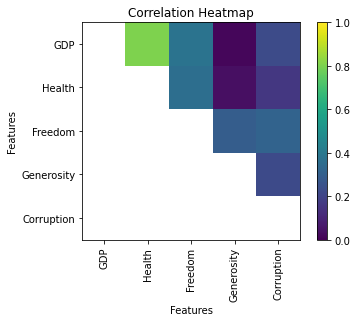

In [17]:
# Create correlation matrix
corr_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

fig, ax = plt.subplots(1,1)

plt.imshow(upper, cmap='viridis', vmax=1, vmin=0)
plt.colorbar()
plt.title('Correlation Heatmap')
feat = ['_','GDP', 'Health', 'Freedom', 'Generosity', 'Corruption']
ax.set_xticklabels(feat, rotation=90)
ax.set_yticklabels(feat)
plt.xlabel('Features')
plt.ylabel('Features')

fig = px.imshow(upper)
fig.update_layout(
    title='Correlation Heatmap')
fig.show()

In [18]:
# py.plot(fig, filename="heatmap", auto_open=True)

We notice that from the correlation heatmap that there exists a strong correlation between `GDP_per_capita` and `Healthy_life_expectancy`. This observation is expected as wealthier countries tend to have a better environment and infrastructure that supports healthy living. Some examples of this include better hospital facilities, access to better nutrition, and programs that promote an active lifestyle.

## Are countries in specific geographic regions happier?

We now shift gears and try to analyze the impacts geographic location has on a country's happiness score. Specifically, we evaluate the `y2020` dataset to determine if neighbouring countries or countries belonging to the same continent are similar in their happiness score. We apply an unsupervised K-means clustering approach to label countries into corresponding continents. As such, we use a cluster size of 7 to resemble the number of continents around the world.

While one approach may be to consider all features in the dataset and then applying a dimensionality reduction method such as t-SNE or PCA, we decide to apply K-means on just the `Happiness_Score`. The analysis is thus performed in one dimension, in which the data points are plotted linearly.

In [19]:

# function taken from tutorial 8

def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")
    return sse

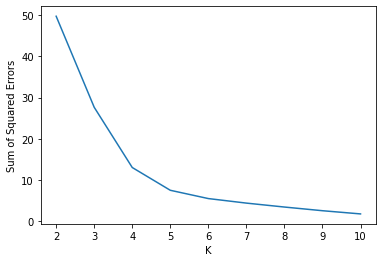

In [20]:
y2020_cluster = y2020.copy()
y2020_cluster = y2020_cluster[['Happiness_Score']]

y2020_scaled = StandardScaler().fit(y2020_cluster).transform(y2020_cluster)
see = plot_sse(y2020_scaled)

fig = px.line(see, x="k", y="sse", title="SSE vs. K")
fig.show()

In [21]:
# py.plot(fig, filename="sme-vs-k", auto_open=True)

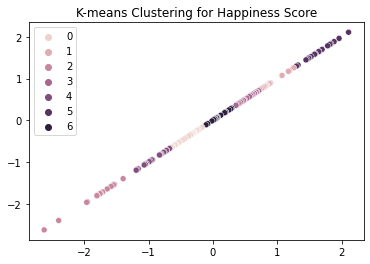

In [22]:
#y2020_reduced_tsne = TSNE(n_components=1, random_state=0).fit_transform(y2020_scaled)
labels = KMeans(n_clusters=7, random_state=0).fit_predict(y2020_scaled)

sns.scatterplot(x=y2020_scaled[:,0], y=y2020_scaled[:,0], hue=labels, data=y2020_scaled, legend='full')

plt.title('K-means Clustering for Happiness Score')


fig = px.scatter(x=y2020_scaled[:,0], y=y2020_scaled[:,0], color=labels)
fig.show()

In [23]:
# py.plot(fig, filename="scatter-k-means", auto_open=True)

In [24]:
# function to return continent from country name
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [25]:
cluster_map = pd.DataFrame()
cluster_map['cluster'] = labels
cluster_map['country'] = y2020['Country']
cluster_map['continent'] = ""

country = cluster_map['country']

In [26]:
# add continents label as ground truth

for i in range(len(cluster_map)):
    try:
        continent = country_to_continent(country[i])
        cluster_map['continent'][i] = continent
    except KeyError:
        cluster_map['continent'][i] = 'N/A'

In [27]:
# create groups based on cluster
for i in range(7):
    globals()['cluster%s' % i] = cluster_map[cluster_map.cluster == i]

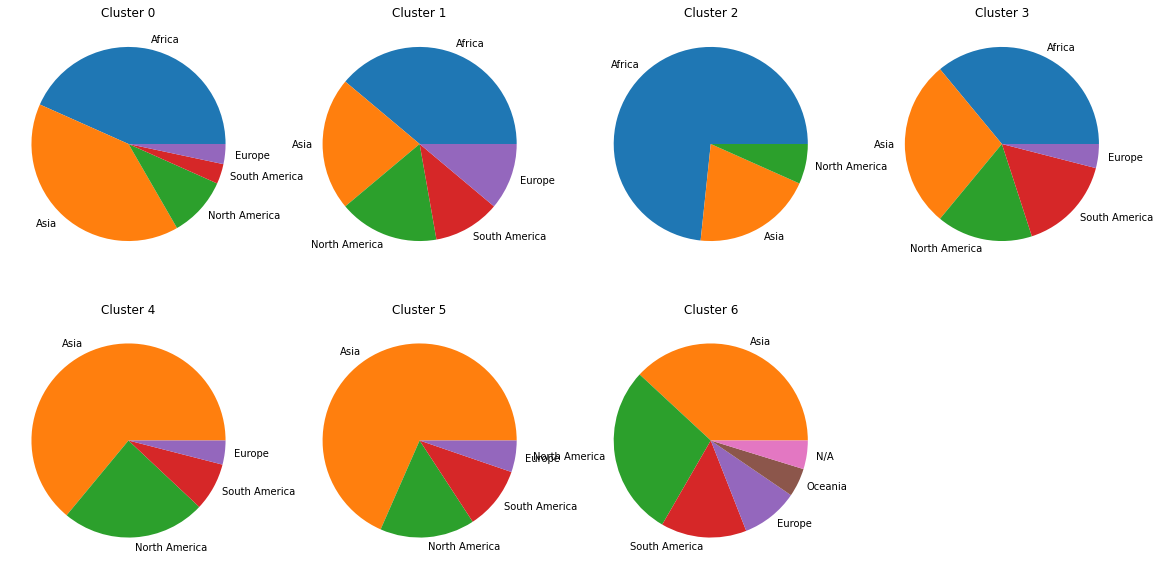

In [28]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))

labels = ['Africa', 'Asia', 'North America', 'South America', 'Europe', 'Oceania', 'N/A']

# no countries belong in Antartica so grouped together with N/A
colours = {'Africa': 'C0',
           'Asia': 'C1',
           'North America': 'C2',
           'South America': 'C3',
           'Europe': 'C4',
           'Oceania': 'C5',
           'N/A': 'C6'}

count = 0
for i in range(2):
    for j in range(4):
        if count == 7:
            break
        globals()['cluster%s' % (count)].continent.value_counts().plot(kind='pie', ax=ax[i][j], title=f"Cluster {count}", label='', labels=labels[i:], colors=[colours[key] for key in labels[i:]])
        count += 1

fig.delaxes(ax[1,3])


We propose an unsupervised approach to learn geographic continents solely based on happiness scores from our dataset. From the above plots, we see that this approach performs fairly poorly in grouping countries based on this criteria. While we do see some countries that are more dominant in certain clusters (e.g. Europe within clusters 1, 5 and 6), there does not seem to be enough supporting evidence for such approach to work. As a result, we conclude that countries belonging to a specific continent do not necessarily share similar happiness scores.

### K-means for multiple variables

We repeat the process but this time taking into account the two most important covariates for our model, `GDP_per_capita` and `Healthy_life_expectancy`.

In [29]:
k = 7
model = KMeans(k)
feature_names = []

X = df[["Happiness_Score", "GDP_per_capita", "Healthy_life_expectancy"]].values
model.fit(X)

KMeans(n_clusters=7)

In [30]:

labels = model.labels_.tolist()
labels = list(map(lambda s: str(s), labels))

fig = px.scatter_3d(df,
                    x="Happiness_Score",
                    y="GDP_per_capita",
                    z="Healthy_life_expectancy",
                    color=labels,
                    color_discrete_sequence=px.colors.qualitative.G10,
                    hover_data= {
                        "Country": True
                    }

            )

fig.update_traces(opacity=0.7,
                  )
fig.update_traces(mode='markers',marker_line_color='rgb(255,255,255)', 
                      marker_line_width=2.5)
fig.update_layout(width=800,
                  title="Scatterplot of happiness".format(k))
fig.show()

In [31]:
# py.plot(fig, filename="scatter3d_plot_happines", auto_open=True)

In [32]:
df_w_conts = df.copy()

countries = df_w_conts["Country"].to_numpy()
conts_col = countries.copy()

for i in range(len(df)):
    try:
        continent = country_to_continent(countries[i])
        conts_col[i] = continent
    except KeyError:
        conts_col[i] = 'N/A'
conts_col
        
df_w_conts["Continents"] = conts_col
df_w_conts.sample(5)

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,Continents
118,2020,Jordan,4.6334,119.0,0.510959,0.683437,0.612827,0.160570,0.715136,Asia
42,2018,Bahrain,6.1050,43.0,0.634170,0.674510,0.816384,0.379371,0.267544,Asia
42,2016,Trinidad and Tobago,6.1680,43.0,0.717960,0.533432,0.794305,0.374128,0.018307,North America
143,2015,Niger,3.8450,144.0,0.032296,0.255051,0.674714,0.241696,0.280402,Africa
45,2019,Kosovo,6.1000,46.0,0.516285,0.630309,0.771337,0.438078,0.004454,N/A


In [33]:
k = 7
model = KMeans(k)
feature_names = []

X = df_w_conts[["Happiness_Score", "GDP_per_capita", "Healthy_life_expectancy"]].values
model.fit(X)

fig = px.scatter_3d(df_w_conts,
                 x="Happiness_Score",
                 y="GDP_per_capita",
                 z="Healthy_life_expectancy",
                 color="Continents",
                 color_discrete_sequence=px.colors.qualitative.G10
            )
fig.update_traces(opacity=0.7,
                  )
fig.update_traces(mode='markers',marker_line_color='rgb(255,255,255)', 
                      marker_line_width=2.5)
fig.update_layout(width=800,
                  title="Scatterplot of happiness by continent".format(k))
fig.show()

In [34]:
# py.plot(fig, filename="scatter3d_plot_hap_conts", auto_open=True)

We propose an unsupervised approach to learn geographic continents, but this time based on happiness scores as well as the `GDP_per_capita` and the `Healthy_life_expectancy`. From the above plots, we see that it perfoms a better but even so, this method still remains a poor choice.

## Trends in happiness

We now evaluate the trends in happiness levels over the years from 2015 to 2020. We calculate the mean happiness scores for all countries belonging in each year to see if there exists an evident trend over time. We also look at specific countries that are selected at random from one of the seven clusters defined previously. Recall that each cluster is supposed to represent a grouping of countries with similar happiness scores. As a result, the analysis will be able to display trends in happiness of countries spanning the whole range (from very unhappy to very happy).

In [35]:
# bootstrap function taken from tutorial 2

def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

In [36]:
# calculate average happiness score with 95% CI
stats_by_year = df.groupby(df['Year']).apply(lambda x: pd.Series({
        'average_happiness': x['Happiness_Score'].mean(),
        'lower_err_happiness': bootstrap_CI(x['Happiness_Score'], 1000)[0],
        'upper_err_happiness': bootstrap_CI(x['Happiness_Score'], 1000)[1]
    }))

In [37]:
# sample random country from each cluster
import random

random.seed(0)
rand_country = []

for i in range(7):
    num_countries = len(cluster_map[cluster_map.cluster == i])
    sample = random.randint(0, num_countries-1)
    rand_country.append(cluster_map[cluster_map.cluster == i]['country'].iloc[sample])
    
print(rand_country)

['Lebanon', 'Brazil', 'Zimbabwe', 'Estonia', 'Nigeria', 'Austria', 'Croatia']


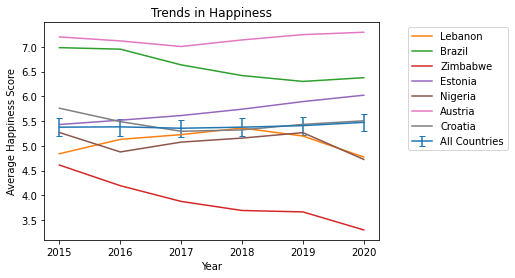

In [38]:
plt.errorbar(stats_by_year.index, stats_by_year.average_happiness,
             yerr = [-stats_by_year.lower_err_happiness + stats_by_year.average_happiness, 
                    -stats_by_year.average_happiness + stats_by_year.upper_err_happiness],
             capsize= 3, label='All Countries')
             
for i in range(7):
    x = df.loc[df['Country'] == rand_country[i]]['Year']
    y = df.loc[df['Country'] == rand_country[i]]['Happiness_Score']
    plt.plot(x, y, label=rand_country[i])

plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Trends in Happiness')
plt.legend(bbox_to_anchor=(1.4, 1))

In [39]:
fig = go.Figure(data=go.Scatter(
        x=stats_by_year.index,
        y=stats_by_year.average_happiness,
        error_y=dict(
            type='data',
            array=-stats_by_year.lower_err_happiness + stats_by_year.average_happiness,
            arrayminus =-stats_by_year.average_happiness + stats_by_year.upper_err_happiness,
            visible=True),
        name='All countries'
    ))

for i in range(7):
    xi = df.loc[df['Country'] == rand_country[i]]['Year']
    yi = df.loc[df['Country'] == rand_country[i]]['Happiness_Score']
    fig.add_trace(go.Scatter(x=xi, y=yi,
                    mode='lines',
                    name=rand_country[i]))


fig.show()

In [40]:
# py.plot(fig, filename="trend-lines", auto_open=True)

The above plot reveals that the average happiness score for all countries experienced a very minimal increase over the years. There does not seem to be enough supporting evidence to explain this *tiny* increase, especially over such a short time period and after considering the error range.

However, there are notable trends that exist between individual countries. While only some countries were sampled from the whole, it is expected that such trends would exist on an individual case by case basis. As such the displayed plots are by no means representative of the countries not displayed from the same cluster.

Countries such as Brazil and Zimbabwe have been experiencing a sharp decline in happiness scores over the past five years. This may be as a result of numerous factors such as increased corruption, lack of government intervention or worsened social services. We notice that Brazil's happiness score was more or less constant from 2015 to 2016. The decline it experienced afterwards may be attributed by hosting the 2016 Summer Olympics as it incurred significant debt and had to make drastic cuts in other areas of spending such as healthcare. This is contrast to the trend Estonia has experienced over the years.



### Visualization of the happiness ranking in 2020 through a map

We now observe where the happiest countries are located in the year 2020. For this we have created a map in which the countries with higher rankings in happiness have a yellowish color, while the countries in the lower positions have a darker color that tends to blue.

In [41]:
'''
World Map
Happiness Rank Accross the World year 2020
'''
happiness_rank = dict(type = 'choropleth', 
           locations = y2020['Country'],
           locationmode = 'country names',
           z = y2020['Happiness_Rank'], 
           text = y2020['Country'],
           autocolorscale=True,
           reversescale=True,
           marker_line_color='darkgray',
           marker_line_width=0.5)
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
world_map_1 = go.Figure(data = [happiness_rank], layout=layout)
mapaaa = iplot(world_map_1)
mapaaa

In [42]:
# py.plot(world_map_1, filename="world_map", auto_open=True)

As we can see, the countries in the highest positions are found in North America, Western Europe and Australia. While the least happy countries are mostly in Africa. In the intermediate positions are countries of South America and Eastern Europe

### MATCHING 

With matching, what we intend is to carry out an analysis having two groups, one for treatment and the other for control, with similar characteristics. That is, they have a similar propensity score, and in this way make a much more rigorous study.

First, we are going to compare both groups in characteristics such as GDP, life expectancy, generosity, and so forth. Without doing any kind of matching, the comparisons between two countries may not be robust. That is why we then calculate the propensity score, and match samples from both groups based on the similarity of their propensity score, and from there we make the same comparison between both groups in different features.

First we calculate the median of GPD per capita and then we create a dummy variable, indicating with 1 the countries that have a GPD greater than the median, and with 0 the countries with a GPD lower than the median

In [43]:
y2020_matching = y2020.copy()
median = y2020_matching['GDP_per_capita'].median()
median
y2020_matching['treatment']= np.where(y2020_matching['GDP_per_capita']>median, 1,0)
y2020_matching.head()

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,treatment
0,2020,Finland,7.8087,1.0,0.836344,0.844840,0.955351,0.280215,0.103730,1
1,2020,Denmark,7.6456,2.0,0.863519,0.860714,0.959279,0.426093,0.071089,1
2,2020,Switzerland,7.5599,3.0,0.905054,0.914502,0.907228,0.472182,0.234856,1
3,2020,Iceland,7.5045,4.0,0.863228,0.879619,0.954867,0.635875,0.728899,1
4,2020,Norway,7.4880,5.0,0.926810,0.885972,0.966724,0.505402,0.185800,1


For each characteristic of the dataset we will compare the control group with the treatment group

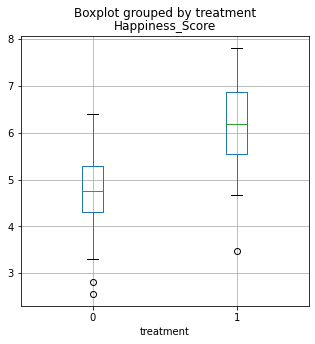

In [44]:
#Happiness Score
y2020_matching.boxplot(by='treatment', column='Happiness_Score', figsize = [5, 5], grid=True)
plt.show()

We see that richer countries have a higher happiness score, with the 25th percentile of rich countries being higher than the 75th percentile of poor countries

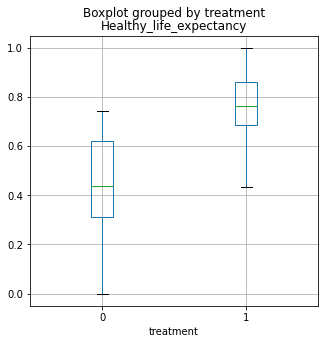

In [45]:
# Healthy life expectancy
y2020_matching.boxplot(by='treatment', column='Healthy_life_expectancy', figsize = [5, 5], grid=True)
plt.show()

We see a similar behaviour to the Happiness score in life expectancy

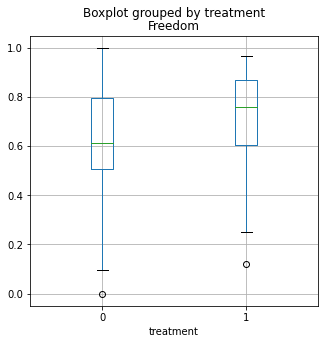

In [46]:
#Freedom
y2020_matching.boxplot(by='treatment', column='Freedom', figsize = [5, 5], grid=True)
plt.show()

With respect to freedom, values are more equal but rich countries have a greater degree of freedom

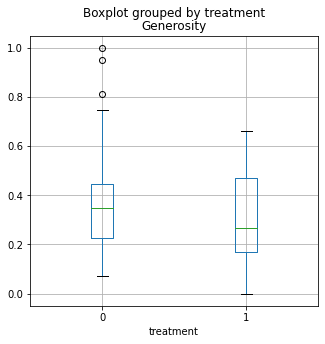

In [47]:
#Generosity
y2020_matching.boxplot(by='treatment', column='Generosity', figsize = [5, 5], grid=True)
plt.show()

With respect to generosity, the mean of poor countries is higher than the rich countries.

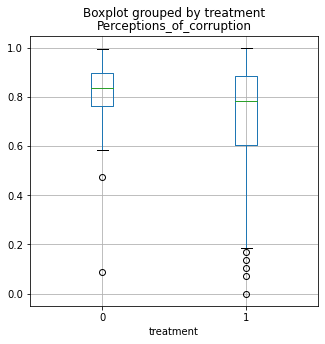

In [48]:
#Perceptions of corruption
y2020_matching.boxplot(by='treatment', column='Perceptions_of_corruption', figsize = [5, 5], grid=True)
plt.show()

In terms of corruption, poor countries seem to be more prone to corruption

### Propensity score model

We will use the propensity scores to match each data point in the treated group to exactly one data point in the control group.
Pairing maximizes the similarity between matched subjects, as captured by their propensity scores.

In [49]:
# let's standardize the continuous features
y2020_matching['Healthy life expectancy'] = (y2020_matching['Healthy_life_expectancy'] - y2020_matching['Healthy_life_expectancy'].mean())/y2020_matching['Healthy_life_expectancy'].std()
y2020_matching['Freedom'] = (y2020_matching['Freedom'] - y2020_matching['Freedom'].mean())/y2020_matching['Freedom'].std()
y2020_matching['Generosity'] = (y2020_matching['Generosity'] - y2020_matching['Generosity'].mean())/y2020_matching['Generosity'].std()
y2020_matching['Perceptions of corruption'] = (y2020_matching['Perceptions_of_corruption'] - y2020_matching['Perceptions_of_corruption'].mean())/y2020_matching['Perceptions_of_corruption'].std()

mod = smf.logit(formula='treatment ~ Healthy_life_expectancy + Freedom + Generosity + Perceptions_of_corruption ', data=y2020_matching)

res = mod.fit()

# # Extract the estimated propensity scores
y2020_matching['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.349780
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                  153
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            4
Date:                Fri, 18 Dec 2020   Pseudo R-squ.:                  0.4954
Time:                        22:42:53   Log-Likelihood:                -53.516
converged:                       True   LL-Null:                       -106.05
Covariance Type:            nonrobust   LLR p-value:                 8.209e-22
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -6.8382      1.952     -3.503      0.000     -10.

This function captures the difference in scores as a distance, but since the distance we defined would always be between 0 and 1, subtracting it from 1 would be a significant measure to use for similarity.

In [50]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [51]:
# Separate the treatment and control groups
treatment_df = y2020_matching[y2020_matching['treatment'] == 1]
control_df = y2020_matching[y2020_matching['treatment'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])
        if(similarity>0.95):
        # Add an edge between the two instances weighted by the similarity between them
            G.add_weighted_edges_from([(control_id, treatment_id, similarity)])
        

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [52]:
print(f"we have matched {len(matching)} pairs")
print(f"length treatment {len(treatment_df)}")
print(f"length control {len(control_df)}")

we have matched 26 pairs
length treatment 76
length control 77


In [53]:
matchingdf = y2020_matching.iloc[[subj_id for t in matching for subj_id in t]]
matchingdf.head()

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,treatment,Healthy life expectancy,Perceptions of corruption,Propensity_score
52,2020,Hungary,6.0004,53.0,0.757679,0.709073,-0.546716,-1.184086,0.948331,1,0.448358,0.912223,0.736978
118,2020,Jordan,4.6334,119.0,0.510959,0.683437,-0.274331,-0.974890,0.715136,0,0.333561,-0.187106,0.739370
67,2020,Dominican Republic,5.6892,68.0,0.639817,0.652041,0.703330,-0.768697,0.782532,1,0.192971,0.130612,0.587159
116,2020,Georgia,4.6726,117.0,0.551319,0.610519,0.155208,-1.411987,0.673480,0,0.007039,-0.383482,0.575604
81,2020,Malaysia,5.3843,82.0,0.760356,0.693006,0.944649,0.851697,0.883407,1,0.376408,0.606158,0.517416


Once the matching is done, we proceed to analyze the characteristics in question again

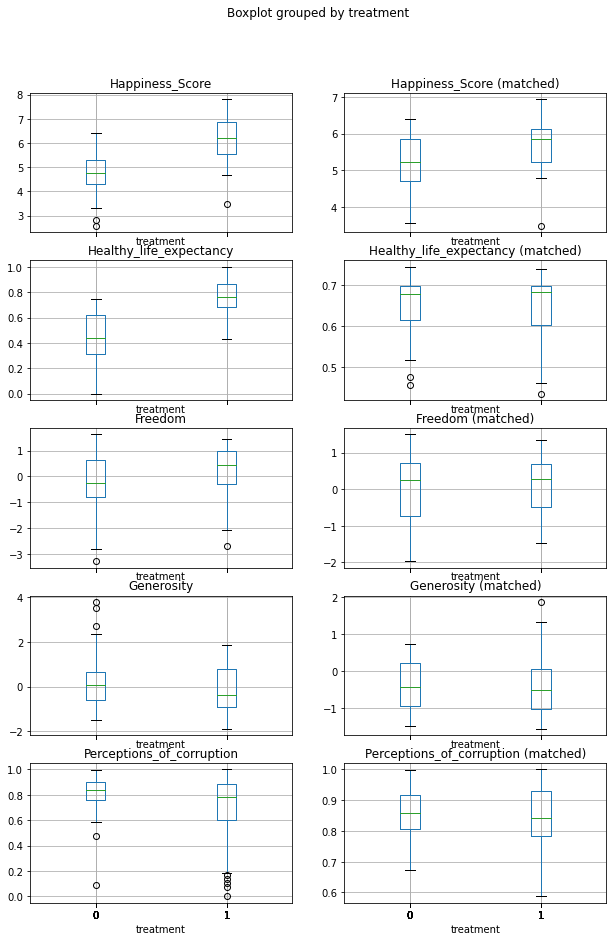

In [54]:
# Comparison of matched vs not matched datasets
features = ['Happiness_Score','Healthy_life_expectancy', 'Freedom', 'Generosity', 'Perceptions_of_corruption']

fig, axs = plt.subplots(len(features), 2, sharex = True, figsize = (10, 15))
fig.suptitle("Comparative matched vs. non-matched (mean and std)", fontsize =20)

for i, feature in enumerate(features):
    y2020_matching.boxplot(by='treatment', column=feature, figsize = (15, 15), grid=True, ax = axs[i//1][0])
    axs[i//1][0].set_title(feature)
for i, feature in enumerate(features):
    matchingdf.boxplot(by='treatment', column=feature, figsize = (15, 15), grid=True, ax = axs[i//1][1])
    axs[i//1][1].set_title(feature+" (matched)")

We can see a notable difference between the model with non-matched and the one with matched samples in the majority of values.

All the variables involved in the calculation of the propensity score are much more similar.
Although the values have been equalized, we can say that the richest countries are also the happiest.

Another way to visualize would allow us to have a better inside knowledge on our new data.

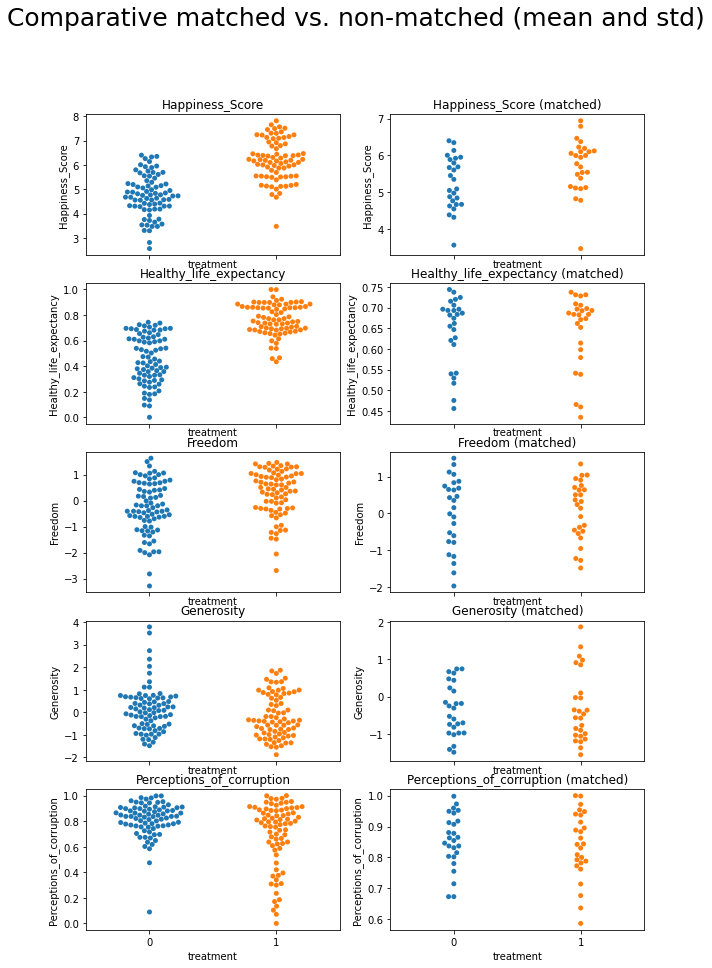

In [55]:
# Comparison of matched vs not matched datasets (bis)

warnings.filterwarnings('ignore')
fig, axs = plt.subplots(5, 2, sharex = True, figsize = (10,15))
fig.suptitle("Comparative matched vs. non-matched (mean and std)", fontsize =25)

for i,feature in enumerate(features):
    sns.swarmplot(x="treatment", y=feature, data=y2020_matching, ax = axs[i//1][0])
    axs[i//1][0].set_title(feature)
for i,feature in enumerate(features):
    sns.swarmplot(x="treatment", y=feature, data=matchingdf, ax = axs[i//1][1])
    axs[i//1][1].set_title(feature+" (matched)")

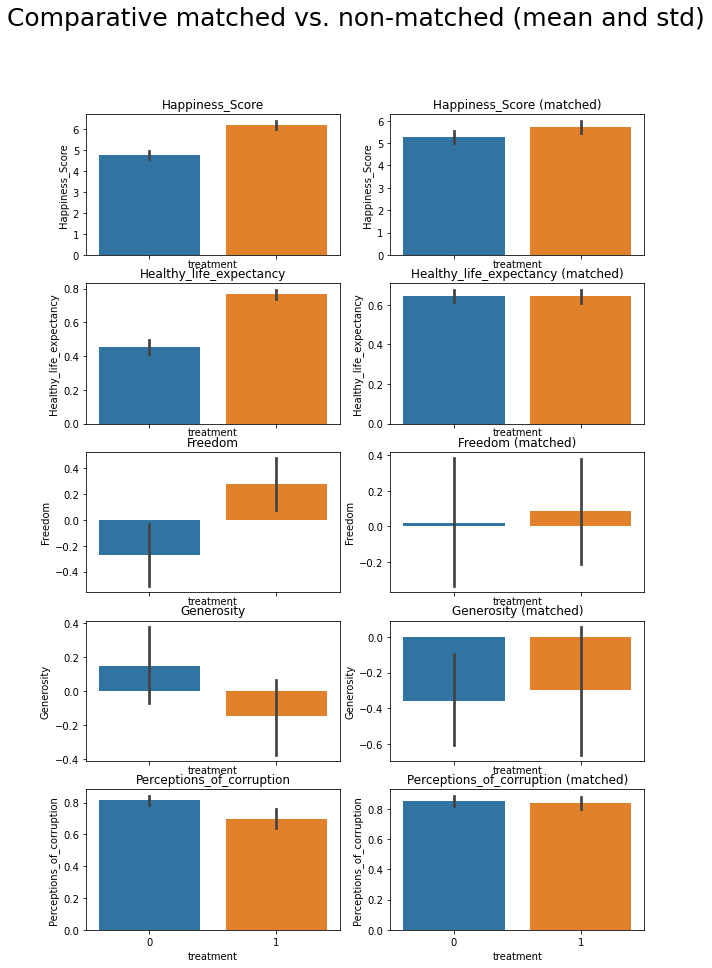

In [56]:
fig, axs = plt.subplots(5, 2, sharex = True, figsize = (10,15))
fig.suptitle("Comparative matched vs. non-matched (mean and std)", fontsize =25)

for i,feature in enumerate(features):
    sns.barplot(x="treatment", y=feature, data = y2020_matching, ax = axs[i//1][0])
    axs[i//1][0].set_title(feature)
for i,feature in enumerate(features):
    sns.barplot(x="treatment", y=feature, data = matchingdf, ax = axs[i//1][1])
    axs[i//1][1].set_title(feature+" (matched)")

# How has the coronavirus impacted happiness?

With the current situation, marked by the presence of the coronavirus, we wanted to try to study the impact of the pandemic on the happiness of the countries. We have obtained the coronavirus data from scarpping the Worldometer webpage. If you want to see how the scrapping was done, there is a notebook in the Data folder called covid19_scrapping. 

## Preprocessing 
First we read the data on the coronavirus that we have scraped. These data points provide us with the number of cases, the number of deaths and the population of each country.

In [57]:
corona= pd.read_csv("Data/covid19_data.csv")


To be able to do the study, we must find a good measure in which we can compare the countries between them. We have considered that the best options were the mortality rate and the infection rate, calculated by dividing the number of cases by the population of each country.

In [58]:
corona['infection rate']= corona.TotalCases/corona.Population
corona['mortality rate']= corona.TotalDeaths/corona.Population

The next step is to join the 2020 dataframe with the coronavirus dataframe, in order to work together with the characteristics of both dataframes.

In [59]:
y2020corona = y2020.copy()

In [60]:
data_infec_death_happy=pd.merge(y2020corona, corona, left_on='Country', right_on='Country', how='left')

data_infec_death_happy.head()

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,Population,TotalCases,TotalDeaths,infection rate,mortality rate
0,2020,Finland,7.8087,1.0,0.836344,0.844840,0.955351,0.280215,0.103730,5544722.0,32582.0,489.0,0.005876,0.000088
1,2020,Denmark,7.6456,2.0,0.863519,0.860714,0.959279,0.426093,0.071089,5801672.0,128321.0,1007.0,0.022118,0.000174
2,2020,Switzerland,7.5599,3.0,0.905054,0.914502,0.907228,0.472182,0.234856,8683918.0,403989.0,6541.0,0.046522,0.000753
3,2020,Iceland,7.5045,4.0,0.863228,0.879619,0.954867,0.635875,0.728899,342269.0,5604.0,28.0,0.016373,0.000082
4,2020,Norway,7.4880,5.0,0.926810,0.885972,0.966724,0.505402,0.185800,5440854.0,42968.0,404.0,0.007897,0.000074


Once both datframes have been joined, we proceed to study the relationship between the coronavirus infection rate and some of the characteristics of happiness such as GDP and life expectancy, which as we have seen when doing the regression, are the two characteristics with a higher coefficient, and therefore have a greater importance.

<AxesSubplot:xlabel='GDP_per_capita', ylabel='infection rate'>

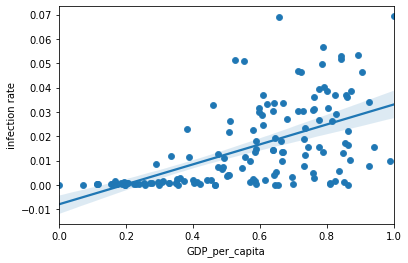

In [61]:
# GDP vs MIR
x = data_infec_death_happy['GDP_per_capita']
y = data_infec_death_happy['infection rate']
sns.scatterplot(x, y) 
sns.regplot(x, y)

There is a significant positive correlation between the max infection rate (dependent variable) & the GDP of a country (independent variable)

In [62]:
# HEALTHY LIFE vs MIR

<AxesSubplot:xlabel='Healthy_life_expectancy', ylabel='infection rate'>

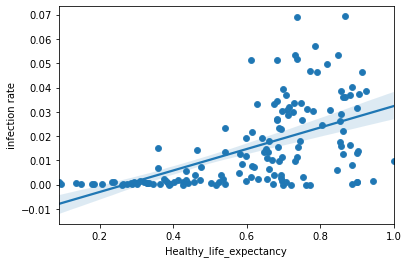

In [63]:

x = data_infec_death_happy['Healthy_life_expectancy']
y = data_infec_death_happy['infection rate']
sns.scatterplot(x,y)    
sns.regplot(x, y)

Since this analysis could be biased because the developed countries may have more confirmed cases because they conduct COVID-19 test more than the developing countries, so another analysis should be done is to test the significance of the result.

In the same way that we have done with infections, we do with deaths, since the dataset format is the same in both cases.

Now we will try to analyze the results

<AxesSubplot:xlabel='GDP_per_capita', ylabel='mortality rate'>

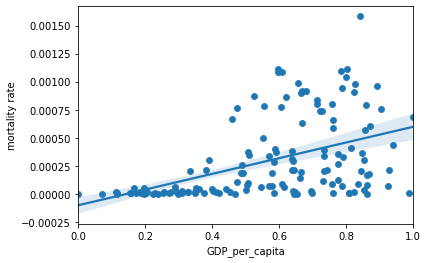

In [64]:
# GDP per capita vs MDR
x = data_infec_death_happy['GDP_per_capita']
y = data_infec_death_happy['mortality rate']
sns.scatterplot(x,y) # Seaborn (applying log for increasing scale on x axis)
sns.regplot(x,y)

The death rate in this analysis confirms the observations we’ve seen previously in which developed countries experience higher COVID-19 cases than developing countries. This result may be biased as developed countries have the infrastructure to support more testing, thus revealing more positive cases. As a result, we used deaths caused by COVID and GDP per capita as the dependent and independent variables, respectively. The results of our study indicate that there exists a significant positive correlation between death rate and GDP per capita. As such, this confirms that developed countries are of higher risk of COVID related deaths than developing countries.

We show below the COVID infection rate cases per country around the world.

In [65]:
'''
World Map CORONAVIRUS  Accross the World year 2020
'''
happiness_rank = dict(type = 'choropleth', 
           locations = y2020['Country'],
           locationmode = 'country names',
           z = data_infec_death_happy['infection rate'], 
           text = y2020['Country'],
           autocolorscale=True,
           reversescale=False,
           marker_line_color='darkgray',
           marker_line_width=0.5)
layout = dict(title = 'Coronavirus Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
world_map_2 = go.Figure(data = [happiness_rank], layout=layout)
mapa = iplot(world_map_2)
mapa

In [66]:
# py.plot(world_map_2, filename="world_map_covid", auto_open=True)